In [2]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading csv files
df= pd.read_csv('customer1.csv')
print("file read sucessfully")

file read sucessfully


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     100 non-null    object 
 1   Age            100 non-null    int64  
 2   Gender         100 non-null    object 
 3   AnnualIncome   100 non-null    float64
 4   SpendingScore  100 non-null    int64  
 5   City           100 non-null    object 
 6   SignupDate     100 non-null    object 
 7   IsActive       100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,SignupDate,IsActive
0,CUST1000,64,Male,82.94,51,Chicago,2020-08-20,Yes
1,CUST1001,36,Male,55.44,92,San Francisco,2022-02-20,No
2,CUST1002,35,Female,60.98,14,New York,2022-08-18,Yes
3,CUST1003,52,Female,74.94,36,Houston,2020-01-18,Yes
4,CUST1004,33,Male,90.57,34,San Francisco,2020-12-25,Yes


In [6]:
df.tail()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,SignupDate,IsActive
95,CUST1095,32,Female,81.43,48,Houston,2021-04-25,Yes
96,CUST1096,55,Male,61.38,72,Houston,2021-12-04,Yes
97,CUST1097,68,Female,56.73,97,Houston,2020-09-24,Yes
98,CUST1098,52,Female,80.57,77,Houston,2022-10-15,No
99,CUST1099,59,Male,81.19,94,Houston,2021-01-19,Yes


In [7]:
print("missing values for each coloumn is",df.isnull().sum())

missing values for each coloumn is CustomerID       0
Age              0
Gender           0
AnnualIncome     0
SpendingScore    0
City             0
SignupDate       0
IsActive         0
dtype: int64


In [7]:
filedf.isnull().sum()

CustomerID       0
Age              0
Gender           0
AnnualIncome     0
SpendingScore    0
City             0
SignupDate       0
IsActive         0
dtype: int64

In [8]:
age_new= int(np.median(filedf['Age']))
print("median of age",age_new)

filedf['Age_new']=filedf['Age'].fillna(age_new)

median of age 40


In [9]:
filedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     100 non-null    object 
 1   Age            100 non-null    int64  
 2   Gender         100 non-null    object 
 3   AnnualIncome   100 non-null    float64
 4   SpendingScore  100 non-null    int64  
 5   City           100 non-null    object 
 6   SignupDate     100 non-null    object 
 7   IsActive       100 non-null    object 
 8   Age_new        100 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.2+ KB


In [10]:
filedf['City'][3]="houston"

C:\Users\91702\AppData\Local\Temp\ipykernel_12272\3160900602.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  filedf['City'][3]="houston"
C:\Users\91702\AppData\Local\Temp\ipykernel_12272\3160900602.py:1: SettingWithCopyWarning: 
A value 

In [11]:
filedf.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,SignupDate,IsActive,Age_new
0,CUST1000,64,Male,82.94,51,Chicago,2020-08-20,Yes,64
1,CUST1001,36,Male,55.44,92,San Francisco,2022-02-20,No,36
2,CUST1002,35,Female,60.98,14,New York,2022-08-18,Yes,35
3,CUST1003,52,Female,74.94,36,houston,2020-01-18,Yes,52
4,CUST1004,33,Male,90.57,34,San Francisco,2020-12-25,Yes,33


### fixing city names (Standardizing Captilization & strip spaces)

In [12]:
filedf['City']=filedf['City'].str.title().str.strip()
filedf.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,SignupDate,IsActive,Age_new
0,CUST1000,64,Male,82.94,51,Chicago,2020-08-20,Yes,64
1,CUST1001,36,Male,55.44,92,San Francisco,2022-02-20,No,36
2,CUST1002,35,Female,60.98,14,New York,2022-08-18,Yes,35
3,CUST1003,52,Female,74.94,36,Houston,2020-01-18,Yes,52
4,CUST1004,33,Male,90.57,34,San Francisco,2020-12-25,Yes,33


In [13]:
# Convert to datetime first
filedf['SignupDate'] = pd.to_datetime(filedf['SignupDate'])

# Extracting year and month as a new feature
filedf['SignupYear'] = filedf['SignupDate'].dt.year
filedf['SignupMonth'] = filedf['SignupDate'].dt.month


filedf.drop(columns=['SignupDate'], inplace=True)

# Show result
filedf.head()


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,IsActive,Age_new,SignupYear,SignupMonth
0,CUST1000,64,Male,82.94,51,Chicago,Yes,64,2020,8
1,CUST1001,36,Male,55.44,92,San Francisco,No,36,2022,2
2,CUST1002,35,Female,60.98,14,New York,Yes,35,2022,8
3,CUST1003,52,Female,74.94,36,Houston,Yes,52,2020,1
4,CUST1004,33,Male,90.57,34,San Francisco,Yes,33,2020,12


In [14]:
filedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     100 non-null    object 
 1   Age            100 non-null    int64  
 2   Gender         100 non-null    object 
 3   AnnualIncome   100 non-null    float64
 4   SpendingScore  100 non-null    int64  
 5   City           100 non-null    object 
 6   IsActive       100 non-null    object 
 7   Age_new        100 non-null    int64  
 8   SignupYear     100 non-null    int32  
 9   SignupMonth    100 non-null    int32  
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 7.2+ KB


### Label Encoding using Sk-Learn


<p> if the coloumn is categorical ,then only you will performing encoding</p>

In [15]:
le_gender=LabelEncoder()  # LabelEncoder() is responsible for encoding each value uniquely
le_active=LabelEncoder()

filedf['Gender']=le_gender.fit_transform(filedf['Gender']) # fit-> it maps the encode to all values of coloumn
filedf['IsActive']=le_active.fit_transform(filedf['IsActive']) # transform->convert and place value to whole coloumn
filedf.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,City,IsActive,Age_new,SignupYear,SignupMonth
0,CUST1000,64,1,82.94,51,Chicago,1,64,2020,8
1,CUST1001,36,1,55.44,92,San Francisco,0,36,2022,2
2,CUST1002,35,0,60.98,14,New York,1,35,2022,8
3,CUST1003,52,0,74.94,36,Houston,1,52,2020,1
4,CUST1004,33,1,90.57,34,San Francisco,1,33,2020,12


In [16]:
filedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     100 non-null    object 
 1   Age            100 non-null    int64  
 2   Gender         100 non-null    int64  
 3   AnnualIncome   100 non-null    float64
 4   SpendingScore  100 non-null    int64  
 5   City           100 non-null    object 
 6   IsActive       100 non-null    int64  
 7   Age_new        100 non-null    int64  
 8   SignupYear     100 non-null    int32  
 9   SignupMonth    100 non-null    int32  
dtypes: float64(1), int32(2), int64(5), object(2)
memory usage: 7.2+ KB


In [17]:
min_age=filedf["Age"].min()
max_age=filedf["Age"].max()
print(f"Range of age->{min_age}to{max_age}.")

range_age=filedf['Age'].agg(['min','max'])
print(f"Range of age->{range_age}.")

#using agg()
range_inc=filedf['Age'].agg(['min','max'])
print(f"Range of Income->\n{range_inc}.")

Range of age->20to68.
Range of age->min    20
max    68
Name: Age, dtype: int64.
Range of Income->
min    20
max    68
Name: Age, dtype: int64.


In [18]:
min_age=filedf['Age'].min()
max_age=filedf['Age'].max()
print(f"Range of age->{min_age} to {max_age}.")

range=filedf['Age'].agg(['min','max'])
print(f"Range of age-> {min_age}.")

Range of age->20 to 68.
Range of age-> 20.


In [19]:
unique_city=filedf['City'].value_counts()
print("No. of unique value of city",unique_city)

No. of unique value of city City
Houston          48
Chicago          20
San Francisco    15
New York         11
Los Angeles       5
Nan               1
Name: count, dtype: int64


#### VISIUALIZATION

In [20]:
<h3>There are two types of Charts:</h3>
<p><strong>Univariate Chart:</strong> These charts are based on a single variable and are used to understand the distribution, central tendency, and spread. Examples include histograms, bar charts, and pie charts.</p>
<p><strong>Multivariate Chart:</strong> These charts use two or more variables to explore relationships or comparisons. Examples include scatter plots, heatmaps, and line charts with multiple series.</p>


SyntaxError: invalid syntax (1413381199.py, line 1)

### Signup trend over time

In [23]:
monthly_Signup = filedf['SignupMonth'].value_counts().sort_index()
print(monthly_Signup)

SignupMonth
1     14
2      5
3      7
4      7
5      3
6      6
7      9
8      9
9     11
10    15
11     8
12     6
Name: count, dtype: int64


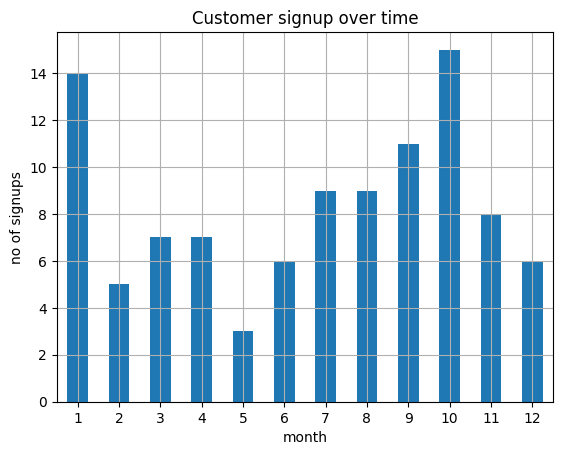

In [24]:
#step-1 set the size of figure
plt.Figure(figsize=(12,5)) # used to set figure size
monthly_Signup.plot(kind='bar')
plt.title('Customer signup over time')
plt.xlabel('month')
plt.ylabel('no of signups')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()



<p>From the observation of the above graphs we can see that <b>october month has most no. of signups</b> while <b>the lowest is in may month</b><p/></p>

### Countplot: Gender Distribution

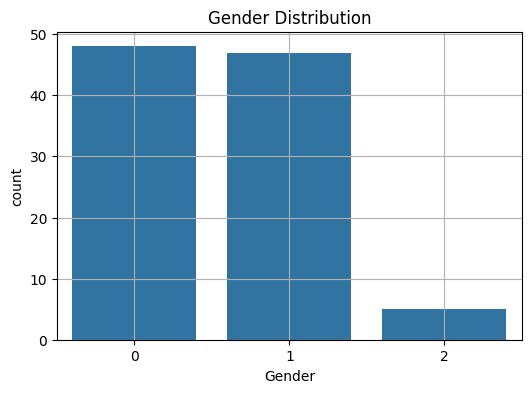

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',data=filedf)
plt.title('Gender Distribution')
plt.grid(True)
plt.show()

### Boxplot: 

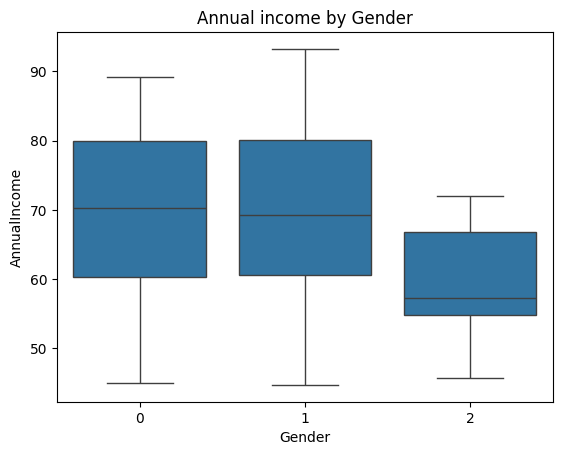

In [22]:
plt.Figure(figsize=(10,5)) # used to set figure size
sns.boxplot(x='Gender',y='AnnualIncome',data=filedf)
plt.title('Annual income by Gender')
plt.show()